In [1]:
import os,sys
sys.path.append('../../sandbox')
import matplotlib.pyplot as plt
import numpy as np
from time import sleep

#import sandbox as sb
import sandbox_new as sbn
import threading

In [2]:
#import bokeh
#bokeh.settings.settings.log_level('error')

In [3]:
%%capture
box = sbn.Sandbox(calibration_file='calibration.json', projector_resolution=(1280, 800))

In [4]:
%%capture
box.module.setup()

In [6]:
%%capture
box.module.update()

### Axes testing

In [10]:
box.module.plot.ax.cla()

In [11]:
box.projector.frame.param.trigger('object')

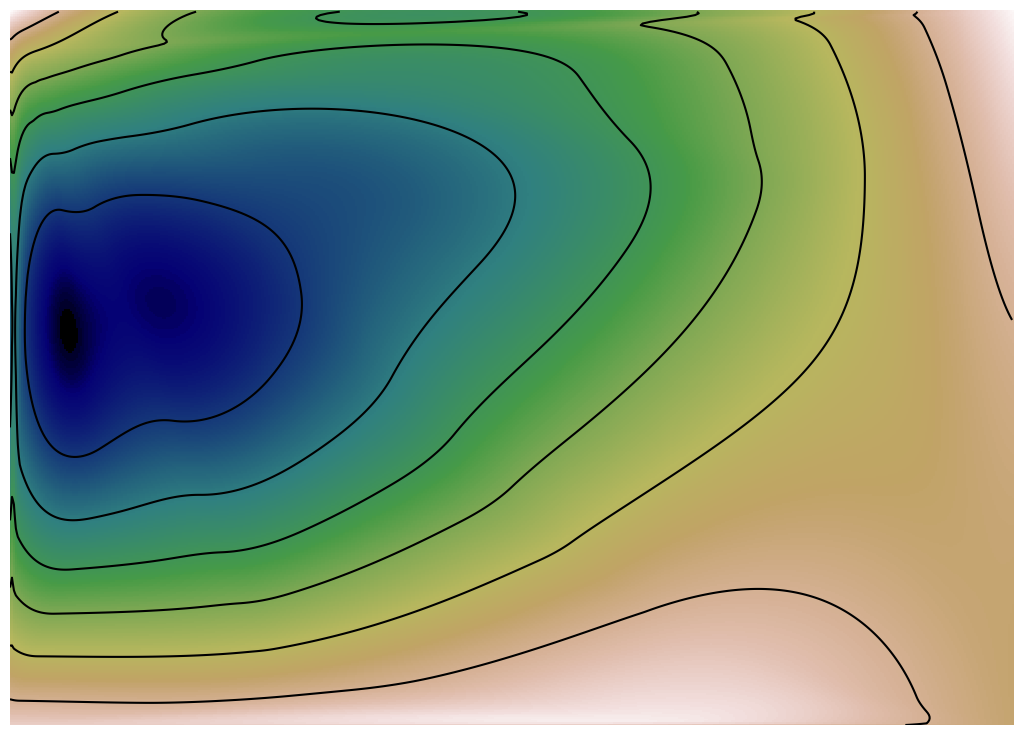

In [14]:
box.projector.frame.object

### Threading

In [10]:
%%capture
box.module.start_thread()

In [12]:
%%capture
box.module.stop_thread()

In [11]:
box.module.plot.contours = False

In [5]:
#box.projector.panel.state

In [6]:
#plt.close("all")

In [7]:
#box.plot.figure

In [8]:
#box.plot.figure

## Debugging

In [5]:
import objgraph
import inspect, random

In [6]:
objgraph.show_growth(limit=10)

function              35679    +35679
dict                  24517    +24517
list                  18115    +18115
tuple                 17824    +17824
weakref                7341     +7341
cell                   6303     +6303
getset_descriptor      4331     +4331
type                   3867     +3867
set                    3587     +3587
wrapper_descriptor     2915     +2915


In [7]:
%%capture
box.projector.start_thread()

In [15]:
%%capture
box.projector.stop_thread()

In [9]:
# Stop and show change
objgraph.show_growth(limit=10)

weakref       7351       +10
tuple        17829        +5
function     35683        +4
count           27        +1
Event            8        +1
Condition       46        +1
deque           53        +1
Socket           9        +1
Thread           2        +1
StringIO         3        +1


In [14]:
obj = objgraph.by_type('matplotlib.figure.Figure')
ran = random.choice(obj)
gra = objgraph.show_backrefs([ran], max_depth=3)
gra.render(filename='graph', format='pdf')

'graph.pdf'

### Calibration

In [7]:
# use projector calibration inside the projector class and live update values in calibration object
box.projector.calibrate_projector()

Column
    [0] Markdown(str)
    [1] IntSlider(end=200, name='Top margin', value=20)
    [2] IntSlider(end=200, name='Left margin', value=20)
    [3] IntSlider(end=1404, name='Map width', start=604, value=1004)
    [4] IntSlider(end=1115, name='Map height', start=315, value=715)

In [9]:
# check calibration class values
box.calibrationdata.__dict__

{'p_width': 1280,
 'p_height': 800,
 'p_dpi': 100,
 'p_top_margin': 20,
 'p_left_margin': 20,
 'p_area_width': 1004,
 'p_area_height': 715,
 'p_area_depth': 200,
 's_width': 512,
 's_heigth': 424,
 's_area_width': 512,
 's_area_height': 424}

In [5]:
# export calibration
box.calibrationdata.save_json('calibration.json')

JSON configuration file saved: calibration.json
